# Introduction
Learning about machine learning and python at the same time.
Jupyter notebook seems so interesting.

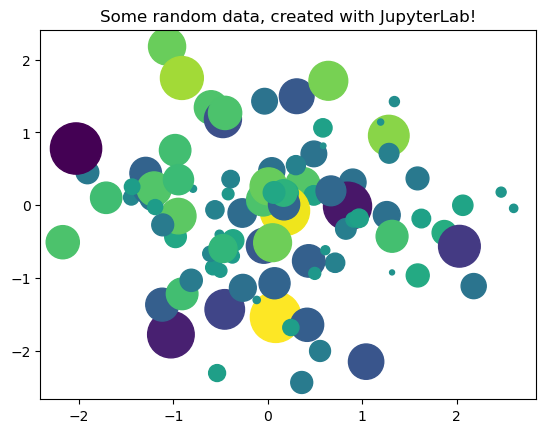

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

This is the note for reading **Math for Deep Learning**.


## Using the numpy Package
At the beginning of all our works, we first need to import the numpy package.

In [3]:
import numpy as np
a = np.arange(50).reshape((5,10))
print(a)
print(a[:4,1:3])
print(a[:,::-1])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[[ 1  2]
 [11 12]
 [21 22]
 [31 32]]
[[ 9  8  7  6  5  4  3  2  1  0]
 [19 18 17 16 15 14 13 12 11 10]
 [29 28 27 26 25 24 23 22 21 20]
 [39 38 37 36 35 34 33 32 31 30]
 [49 48 47 46 45 44 43 42 41 40]]


The ":" means all the elements along the specific dimension.
And incrementing by -1 means to reverse the values. Incrementing by 2 just print every other number.

## Importing Data

Numpy array can be written and loaded from the disk.
By using the `np.save` and `np.load` functions.

In [9]:
a = np.random.randint(0,5,(3,4))
print("a:")
print(a)
np.save("random.npy",a)
b = np.load("random.npy")
print("b:")
print(b)

a:
[[4 4 2 2]
 [0 2 3 2]
 [1 2 1 3]]
b:
[[4 4 2 2]
 [0 2 3 2]
 [1 2 1 3]]


## The SciPy package

In [13]:
import scipy
scipy.__version__

'1.9.3'

A quick test:

In [4]:
import numpy as np
from scipy.stats import ttest_ind
a = np.random.normal(0,1,1000)
b = np.random.normal(0,0.5,1000)
c = np.random.normal(0.1,1,1000)
test1 = ttest_ind(a,b)
test2 = ttest_ind(a,c)
print(test1)
print(test2)

Ttest_indResult(statistic=-0.2893455444958218, pvalue=0.77234698257218)
Ttest_indResult(statistic=-1.830859010896615, pvalue=0.06727044893979725)


In the `np.random.normal()` function, all the different data points are extracted from a normal distribution (or say a Gaussian curve). The first parameter is the average, the second the standard deviation.

In this example, a and b are more likely to be similar because they have the same average value. Their difference lies in the standard deviation, which contributes to only a small part in the t-test.

## Matplotlib
Matplotlib are used to generate graphs.

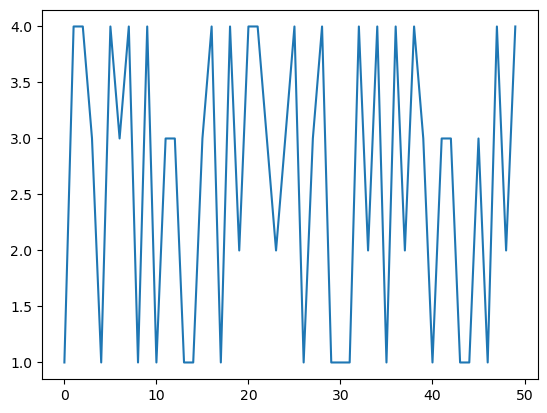

array([1, 4, 4, 3, 1, 4, 3, 4, 1, 4, 1, 3, 3, 1, 1, 3, 4, 1, 4, 2, 4, 4,
       3, 2, 3, 4, 1, 3, 4, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 3, 1, 3, 3, 1,
       1, 3, 1, 4, 2, 4])

In [16]:
import numpy as np
import matplotlib.pylab as plt
x = np.random.randint(1,5,50)
plt.plot(x)
plt.show()
x

You can also plot a 3D plot using the Matplotlib.

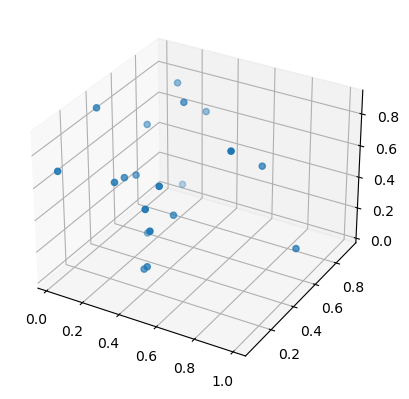

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
import numpy as np
x = np.random.random(20)
y = np.random.random(20)
z = np.random.random(20)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

## Scikit-Learn
Sometimes in this book, we might need to implement deep-learning and build a simple neural network or two. In this case, we will use `sklearn`.

As an example, we quickly build a simple neural network to classify small $8\times8$-pixel grayscale images of handwritten digits, and the dataset is built into sklearn.

In [40]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

#1
d = load_digits()
digits = d["data"]
labels = d["target"]

#2
N = 200
idx = np.argsort(np.random.random(len(labels)))
x_test, y_test = digits[idx[:N]], labels[idx[:N]]
x_train, y_train = digits[idx[N:]], labels[idx[N:]]

#3
clf = MLPClassifier(hidden_layer_sizes=(256,))
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
pred = clf.predict(x_test)
err = np.where(y_test != pred)[0]
print("score :", score)
print("errors:")
print("    actual   :", y_test[err])
print("    predicted:", pred[err])

(array([61]),)
score : 0.995
errors:
    actual   : [4]
    predicted: [7]


1. The first steps are importing the `load_digits` function to return small digit image dataset and the `MLPClassifier` class to train the traditional neural network, a multilayer perceptron (whatever that is). We get the images and their associating labels (0...9). Because the images are $8\times8$, and there are 1797 images in total. `digits` is actually a 2D NumPy array with 1797 rows, and 64 columns per row. `labels` is just a vector with 1797 digit labels.
2. We randomize the order of the images (remember to keep the right label with the right digit) and extract train and test data. `np.argsort()` returns the indicies that will sort the array. In this way, we extracted the first 200 digit images as the test data, and use the rest 1579 digit images as the training data.
3. Finally, we build a model with an instance of the MLPClassifier. We only specify the size of the hidden layer, which is the double of the elements in the vector.

We finally get the overall accuracy (`score`) for our model (`clf`). And we can see all the errors. The `np.where` function returns an array and the first element is the index.